<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-подготовка-данных-к-анализу" data-toc-modified-id="Обзор-и-подготовка-данных-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и подготовка данных к анализу</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Изучение-и-проверка-данных" data-toc-modified-id="Изучение-и-проверка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение и проверка данных</a></span></li><li><span><a href="#Воронка-событий" data-toc-modified-id="Воронка-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Воронка событий</a></span></li><li><span><a href="#Анализ-результатов-эксперимента" data-toc-modified-id="Анализ-результатов-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ результатов эксперимента</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ поведения пользователей мобильного приложения


**Описание проекта**

   В стартапе - мобильное приложение - онлайн магазин продуктов питания, необходимо разобраться в поведении пользователей. Необходимо изучить воронку продаж и узнать: 
    1. как пользователи доходят до покупки,
    2. сколько пользователей доходит до покупки, 
    3. сколько пользователей «застревает» на предыдущих шагах и на каких именно.

   Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры обеспокоены, что пользователям будет непривычно. Для принятия взвещшенного решения проведен А/А/В - тест, где пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Нобходимо выяснить, какой шрифт лучше, исследовав результаты A/A/B- эксперимента. Окончательное решение о шрифтах необходимо принять по результатам A/A/B- теста. 


**Цель исследования**

Подготовить анализ поведения пользователей и результатов А/А/В - теста для принятий решения об изменениях.


 **Ход исследования**

1. Обзор данных.
2. Предобработка данных.
3. Изучение и проверка данных.
4. Изучение воронки событий.
5. Анализ результатов эксперимента.
6. Общий вывод.

## Обзор и подготовка данных к анализу

В этом разделе проведем обзор и подготовку данных к анализу:
1. Выгрузим и познакомимся с данными.
2. Найдем и устраним недочеты в данных.

Составим первое представление о данных. Импортируем необходимые для анализа библиотеки.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mth

# импорт библиотек для построения графиков
from plotly import graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly
import plotly.express as px

In [2]:
# зададим параметры отображения
pd.set_option('display.max_colwidth', 0)
pd.options.display.max_columns = None

Познакомимся с данными. Для этого создадим функцию, которая выводит общую информацию о данных, а также проверяет данные на пропуски и дубликаты:

In [4]:
def df_info(df):
    print('Познакомимся с данными')
    print('_' * 50, '\n')
    display(df.head(10))
    print()
    print('Посмотрим сводную информация о данных')
    print('_' * 50, '\n')
    df.info()
    print()
    print("Проверим данные на пропуски и дубликаты")
    print('_' * 50, '\n')
    print()
    print("Доля пропусков:")
    display(df.isna().mean().round(2))
    print()
    print("Количество дубликатов:", df.duplicated().sum()) 
    print('_' * 50, '\n')

Загрузим и познакомимся с данными

In [5]:
df_info(df)

Познакомимся с данными
__________________________________________________ 



,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246



Посмотрим сводную информация о данных
__________________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB

Проверим данные на пропуски и дубликаты
__________________________________________________ 


Доля пропусков:


EventName         0.0
DeviceIDHash      0.0
EventTimestamp    0.0
ExpId             0.0
dtype: float64


Количество дубликатов: 413
__________________________________________________ 



Познакомимся со значениями в столбцах `EventName`, `ExpId`:

In [6]:
# функция подсчета количества и вывода уникальных значений
def unique_info_columns(df, column):
    print('Количество уникальных объектов:', df[column].nunique())
    print('_' * 50, '\n')
    # количество заведений каждого значения
    print('Уникальные значения', column, 'по частоте использования:')
    print()
    print(df[column].value_counts().head(10))

In [7]:
unique_info_columns(df, 'EventName')

Количество уникальных объектов: 5
__________________________________________________ 

Уникальные значения EventName по частоте использования:

MainScreenAppear           119205
OffersScreenAppear         46825 
CartScreenAppear           42731 
PaymentScreenSuccessful    34313 
Tutorial                   1052  
Name: EventName, dtype: int64


In [8]:
unique_info_columns(df, 'ExpId')

Количество уникальных объектов: 3
__________________________________________________ 

Уникальные значения ExpId по частоте использования:

248    85747
246    80304
247    78075
Name: ExpId, dtype: int64


Итак, таблица с действиями пользователей содержит 4 столбца и 244126 строк. 

Согласно документации к данным:

* `EventName` — название события;
* `DeviceIDHash` — уникальный идентификатор ;
* `EventTimestamp` — время события;
* `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

**Вывод**

В данных обнаружены следующие недочеты:

1. 413 дубликатов данных, которые необходимо удалить.
2. Тип данных в столбце `EventTimestamp` указан в формате unix time, приведем его к формату даты и времени datetime, а также создадим отдельный столбец с датой.
3. Дадим столбцам более удобные для отражения сущности названия.
4. Для удобства работы, названиям событий дадим формулировки, отражающие сущности действия.
5. Для удобства обработки результатов теста заменим названия тестируемых групп на:

   - контрольная группа 246 - A1,
   - контрольная группа 247 - A2,
   - экспериментальная группа 248 - B.

Чтобы двигаться дальше, необходимо устранить проблемы в данных.

## Предобработка данных

Переименуем столбцы:

In [9]:
df = df.rename(columns={'EventName':'event_type', 
                        'DeviceIDHash':'device_id', 
                        'EventTimestamp':'event_datetime', 
                        'ExpId':'test_group'}
        )

Добавим столбец с датой и временем и отдельный столбец с датой:

In [10]:
df['event_datetime'] = pd.to_datetime(df['event_datetime'], unit='s')
df['event_date'] = pd.to_datetime(df['event_datetime'], unit='s').dt.date

Дадим названиям событий удобные формулировки:

In [11]:
# функция замены английский названий событий на русские

def change_event_type(row):
    if row == 'MainScreenAppear':
        return "visit_main_screen"
    elif row == 'OffersScreenAppear':
        return "views_product"
    elif row == 'CartScreenAppear':
        return "views_cart_screen"
    elif row == 'PaymentScreenSuccessful':
        return "successful_payment"
    elif row == 'Tutorial':
        return "views_tutorial"
    return row

# применим функцию к столбцу event_type
df['event_type'] = df['event_type'].apply(change_event_type)

Ззменим названия тестируемых групп:

In [12]:
# функция замены старых названий групп на новые
def change_group_name(row):
    if row == 246:
        return "A1"
    elif row == 247:
        return "A2"
    elif row == 248:
        return "B"
    return row

# применим функцию к столбцу test_group
df['test_group'] = df['test_group'].apply(change_group_name)

Удалим обнаруженные дубликаты. 

In [13]:
df = df.drop_duplicates()

# всего было 244126 строк из них 413 дубликатов, поэтому должно остаться 243713 строк
len(df)

243713

In [14]:
# посмотрим на обновленную таблицу данных
df.head()

,event_type,device_id,event_datetime,test_group,event_date
0,visit_main_screen,4575588528974610257,2019-07-25 04:43:36,A1,2019-07-25
1,visit_main_screen,7416695313311560658,2019-07-25 11:11:42,A1,2019-07-25
2,successful_payment,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
3,views_cart_screen,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
4,successful_payment,6217807653094995999,2019-07-25 11:48:42,B,2019-07-25


**Вывод**

Данные предобработаны и полностью готовы для дальнейшего анализа.

## Изучение и проверка данных

В этой главе мы решим следующие задачи:

1. Определим сколько всего событий в логе.
2. Определим сколько всего пользователей в логе.
3. Определим сколько в среднем событий приходится на пользователя.
4. Определим данными за какой период мы располагаем. 
5. Визуализируем распределение событий по дате и времени. 
6. Определим одинаково ли полные данные за весь период.
7. Определим период с полноценными данными и отбросим более старые даты. 
8. Определим много ли событий и пользователей мы потеряли, отбросив старые данные.
9. Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

Решим сразу первые четыре поставленные задачи:

In [15]:
# функция для отображения основной информации о логах  
def logs_users_info(df):
    print("Всего событий в логе:", df['event_type'].count())
    print()
    print('Всего пользователей в логе:', df['device_id'].nunique())
    print()
    print('Среднее количество событий на одного пользователя:', int(len(df) / df['device_id'].nunique()))
    print()
    print("Период данных: с", df['event_date'].min(), "по", df['event_date'].max())

In [16]:
# посмотрим на первоначальные данные
logs_users_info(df)

Всего событий в логе: 243713

Всего пользователей в логе: 7551

Среднее количество событий на одного пользователя: 32

Период данных: с 2019-07-25 по 2019-08-07


Посмотрим на распределение количества событий, совершенных пользователями. Таким образом определим уместно ли рассчитывать среднее количество событий на одного пользователя через среднее арифметическое.

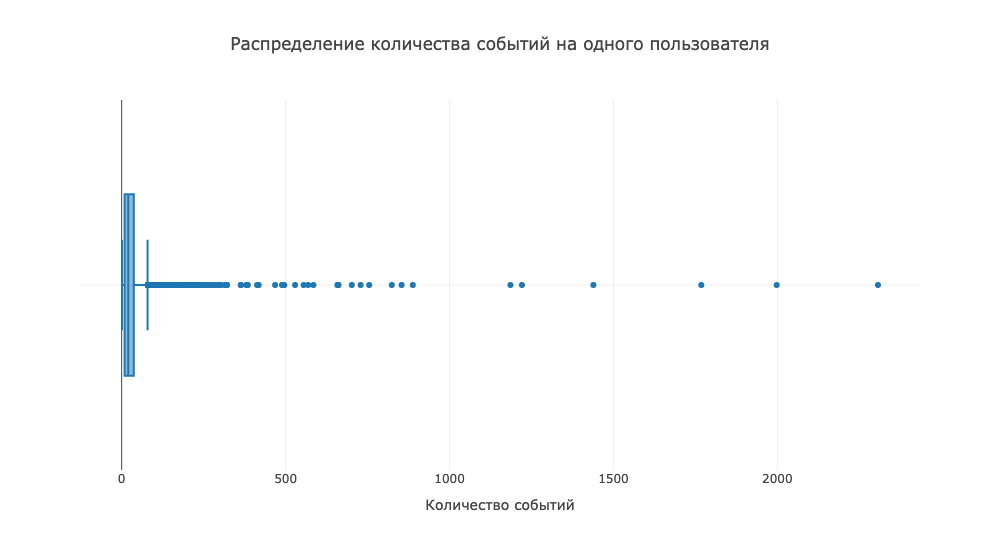

In [17]:
# распределение количества событий на одного пользователя
fig = px.box(df.groupby('device_id').agg({'event_type':'count'}), 
                   x='event_type', 
                   template='gridon',
                   title="Распределение количества событий на одного пользователя",
             labels={'event_type':'Количество событий'})
            
fig.update_layout(width=1000, height=550)


fig.show("png")

In [18]:
# выведем основные сттатистики в табличном виде
df.groupby('device_id').agg({'event_type':'count'}).describe()

,event_type
count,7551.000000
mean,32.275593
std,65.154219
min,1.000000
25%,9.000000
50%,20.000000
75%,37.000000
max,2307.000000


Таким образом выяснили, что данные о количестве заказов на одного пользователя распределены неравномерно и имеют довольно большие выбросы. В данной ситуации среднее количество событий на одного пользователя правильнее рассчитывать через медиану, так как она более устойчива к выбросам.

In [19]:
 print('Среднее количество событий на одного пользователя:',
       int(df.groupby('device_id').agg({'event_type':'count'}).median()))

Среднее количество событий на одного пользователя: 20


С учетом нового расчета откорректируем функцию logs_users_info и введем переменные для дальнейшего расчета количества отрезанных данных:

In [20]:
initial_total_events = df['event_type'].count()
initial_total_users = df['device_id'].nunique()
initial_avg_events = int(df.groupby('device_id').agg({'event_type':'count'}).median())

In [21]:
# функция для отображения основной информации о логах  
def logs_users_info(df, total_events, total_users, avg_events):
    print("Всего событий в логе:", total_events)
    print()
    print('Всего пользователей в логе:', total_users)
    print()
    print('Среднее количество событий на одного пользователя:', avg_events)
    print()
    print("Период данных: с", df['event_date'].min(), "по", df['event_date'].max())

Посмотрим на распределение событий по датам:

In [22]:
# посмотрим на общее количество событий по дням
df.pivot_table(index='event_date', values='event_type', aggfunc='count')

,event_type
event_date,
2019-07-25,9
2019-07-26,31
2019-07-27,55
2019-07-28,105
2019-07-29,184
2019-07-30,412
2019-07-31,2030
2019-08-01,36141
2019-08-02,35554


In [23]:
# посмотрим на распределение общего количества каждого события по дням
(
    df
    .groupby(['event_date', 'event_type'])['device_id']
    .count()
    .reset_index()
    .sort_values(by='event_date')
    .rename(columns={'device_id':'count'})
)

,event_date,event_type,count
0,2019-07-25,successful_payment,2
1,2019-07-25,views_cart_screen,2
2,2019-07-25,views_product,1
3,2019-07-25,visit_main_screen,4
4,2019-07-26,successful_payment,3
...,...,...,...
63,2019-08-07,views_product,5940
64,2019-08-07,views_tutorial,70
61,2019-08-07,successful_payment,4242
62,2019-08-07,views_cart_screen,5054


Построим гистограмму распределения событий за весь период:

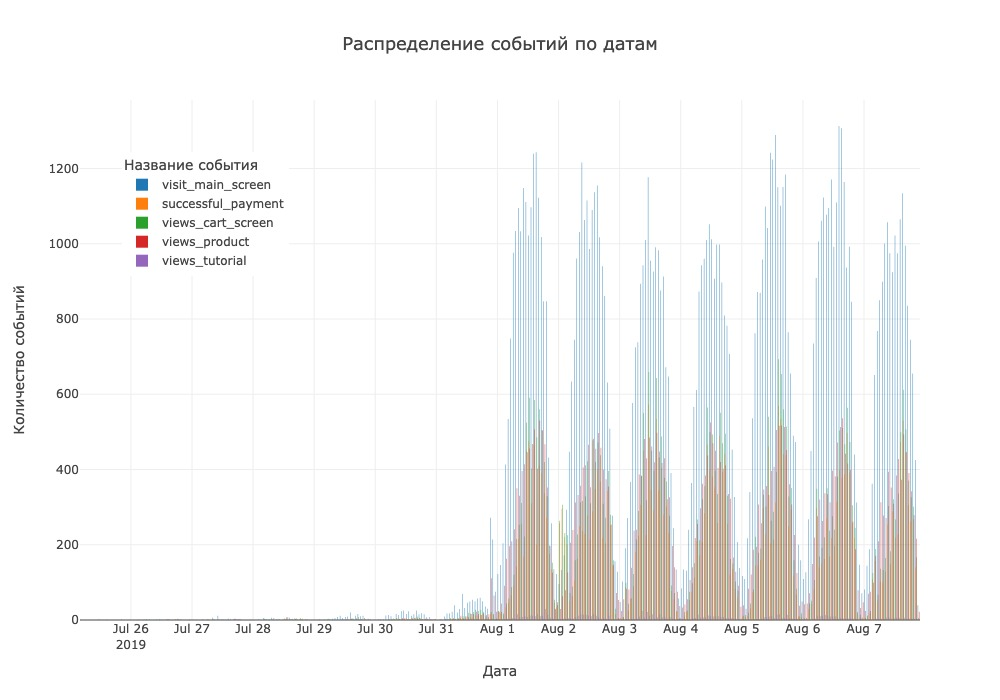

In [24]:
fig = px.histogram(df, 
                   x='event_datetime', 
                   color='event_type',
                   barmode='group',
                   template='gridon',
                   title='Распределение событий по датам')

fig.update_layout(xaxis_title='Дата', 
                  yaxis_title='Количество событий', 
                  autosize=False, 
                  width=1000, 
                  height=700, 
                  legend=dict(x=0.05, y=0.9), 
                  title={'font':dict(size=18)}, 
                  legend_title='Название события'
                 )
fig.update_xaxes(dtick='d1')


fig.show("jpg")

Данные о событиях до 1 августа представлены слабо, поскольку они не одинаково полные за весь период. Поэтому ограничим период анлиза данных для лучшей визуализации с 31 июля до 8 августа.

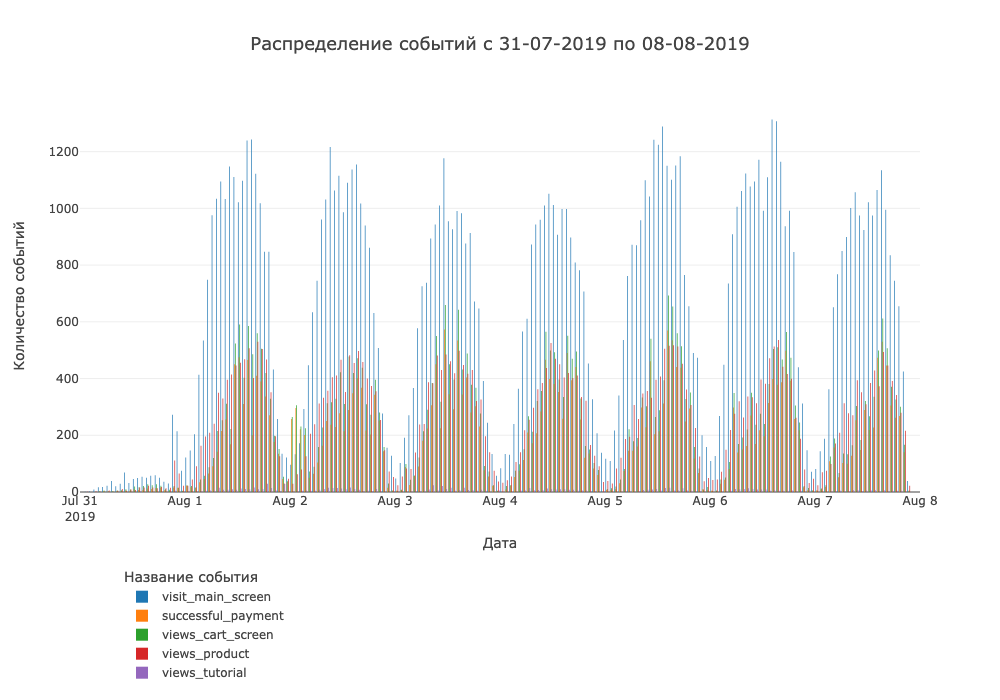

In [25]:

fig = px.histogram(df, 
                   x='event_datetime', 
                   color='event_type',
                   barmode='group',
                   template='xgridoff',
                   title='Распределение событий c 31-07-2019 по 08-08-2019', 
                   range_x=['2019-07-31', '2019-08-08'])

fig.update_layout(xaxis_title='Дата', 
                  yaxis_title='Количество событий', 
                  autosize=False, 
                  width=1000, 
                  height=700, 
                  legend=dict(x=0.05, y=-0.5), 
                  title={'font':dict(size=18)}, 
                  legend_title='Название события'
                 )


fig.show("png")

**Вывод**

   Сделать какие-либо значимые выводы по данным с  25 июля по 1 августа невозможно, так как данные представлены не полностью за этот период. <br>    Тогда как на протяжении недели с 1 августа 00:00 по 7 августа 22:00 ативность пользователей в течение дня распределяется равномерно: с утра постепенно растет в течение дня до 16:00 - 18:00, затем закономерно падает к 24:00. 
   
   Итак, мы обладаем полноценными данными только за период с 1 по 7 августа включительно, поэтому в дальнейшем корректного анализа данных будем использовать только это срез данных, отбросив предыдущие даты.

А также посмотрим много ли событий и пользователей мы потеряли, отбросив старые данные.

In [26]:
# первоначальные данные о логах
logs_users_info(df, initial_total_events, initial_total_users, initial_avg_events)

Всего событий в логе: 243713

Всего пользователей в логе: 7551

Среднее количество событий на одного пользователя: 20

Период данных: с 2019-07-25 по 2019-08-07


In [27]:
# сделаем срез данных за выбранных период
df = df.query('event_datetime > "2019-08-01" and event_datetime < "2019-08-08"').reset_index()

In [28]:
# расчет событий, пользователей и среднего количества для обновленных данных
correct_total_events = df['event_type'].count()
correct_total_users = df['device_id'].nunique()
correct_avg_events = int(df.groupby('device_id').agg({'event_type':'count'}).median())

In [29]:
# обновленный срез данных
logs_users_info(df, correct_total_events, correct_total_users, correct_avg_events)

Всего событий в логе: 240887

Всего пользователей в логе: 7534

Среднее количество событий на одного пользователя: 19

Период данных: с 2019-08-01 по 2019-08-07


Произведем расчет отрезанных данных:

In [30]:
print(f"Отбросили {initial_total_events - correct_total_events} событий в логе"
      f", что составляет {round((1 - correct_total_events / initial_total_events) * 100, 2)}% от первоначальных данных")
print()
print(f"Отбросили {initial_total_users - correct_total_users} пользователей в логе"
      f", что составляет {round((1 - correct_total_users / initial_total_users) * 100, 2)}% от первоначальных данных")
print()
print(f"Среднее количество событий на одного пользователя в логе уменьшилось на: {initial_avg_events - correct_avg_events}")

Отбросили 2826 событий в логе, что составляет 1.16% от первоначальных данных

Отбросили 17 пользователей в логе, что составляет 0.23% от первоначальных данных

Среднее количество событий на одного пользователя в логе уменьшилось на: 1


Проверим, что пользователи всех трех тестовых групп остались в данных.

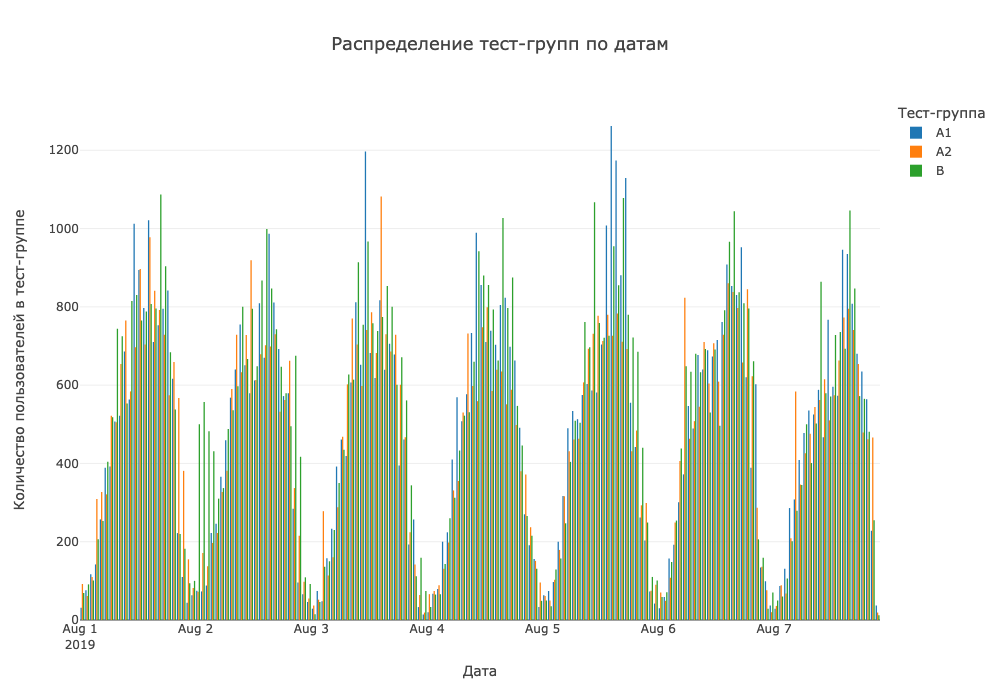

In [31]:
fig = px.histogram(df, 
                   x='event_datetime', 
                   color='test_group',
                   barmode='group',
                   template='xgridoff',
                   title='Распределение тест-групп по датам'
                  )

fig.update_layout(xaxis_title='Дата', 
                  yaxis_title='Количество пользователей в тест-группе', 
                  autosize=False, 
                  width=1000, 
                  height=700, 
                  title={'font':dict(size=18)}, 
                  legend_title='Тест-группа'
                 )
fig.update_xaxes(dtick='d1')


fig.show("png")

**Вывод**

В результате изучения и проверки логов был обнаружен период неполноценных данных с 25 июля по 1 августа. Данные представлены в полном объеме только за период с 1 по 8 августа. Поэтому дальнейший анализ будем проводить на этом срезе данных. Отбросив малоинформативные данные мы потеряли всего 1.16% событий и 0.23% пользователей. 

Итоги полноценных данных:

 * Всего событий в логе: 240887,
 * Всего пользователей в логе: 7534,
 * Среднее количество событий на одного пользователя: 19. 

## Воронка событий

В этом разделе будут выполнены следующие задачи:

1. Определим какие события есть в логах и как часто они встречаются.
2. Посчитаем, сколько пользователей совершали каждое из этих событий. Посчитаем долю тех пользователей, которые хоть раз совершали событие.
3. Предположим, в каком порядке происходят события. Определим все ли события выстраиваются в последовательную цепочку. 
4. По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). 
5. Определим на каком шаге теряется больше всего пользователей.
6. Определим какая доля пользователей доходит от первого события до оплаты.

**1. Определим какие события есть в логах и как часто они встречаются.**

In [32]:
(
    df
    .pivot_table(index='event_type', 
                 values='device_id', 
                 aggfunc='count')
    .rename(columns={'device_id':'event_count'})
    .sort_values(by='event_count', ascending=False)
    .reset_index()
)

,event_type,event_count
0,visit_main_screen,117328
1,views_product,46333
2,views_cart_screen,42303
3,successful_payment,33918
4,views_tutorial,1005


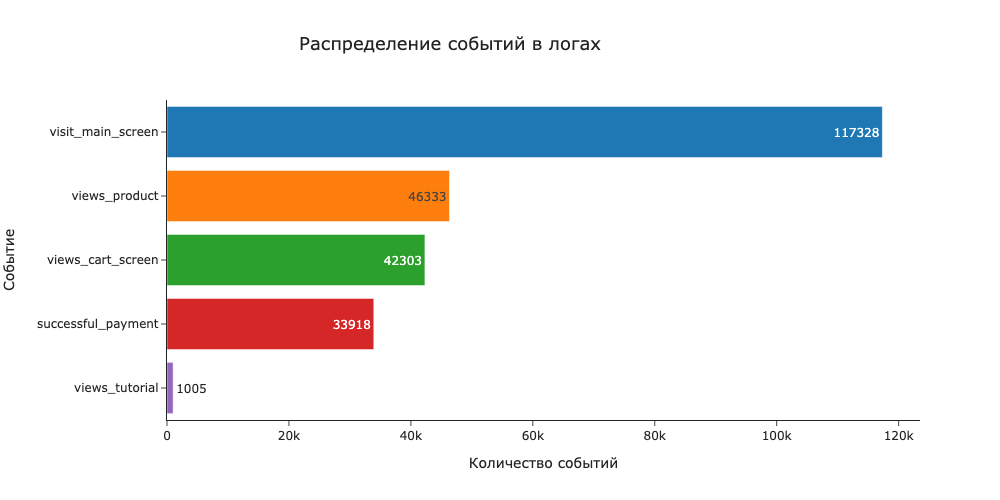

In [33]:
# построим график распределения событйи в логах
fig = px.bar((df
              .pivot_table(index='event_type', 
                           values='device_id', 
                           aggfunc='count')
              .rename(columns={'device_id':'event_count'})
              .sort_values(by='event_count', ascending=False)
              .reset_index()),
             x='event_count', 
             y='event_type', 
             color='event_type', 
             text='event_count',
             template='simple_white', 
             title='Распределение событий в логах'
            )

fig.update_layout(xaxis_title='Количество событий', 
                  yaxis_title='Событие', 
                  autosize=False,
                  showlegend=False,
                  width=1000,
                  height=500, 
                  title={'font':dict(size=18), 'x':0.45})


fig.show("png")

**2. Посчитаем, сколько пользователей совершали каждое из этих событий. Посчитаем долю тех пользователей, которые хоть раз совершали событие.**

In [34]:
count_users_in_event = (
    df
    .pivot_table(index='event_type', 
                 values='device_id', 
                 aggfunc='nunique')
    .rename(columns={'device_id':'users_count'})
    .sort_values(by='users_count', ascending=False)
    .reset_index()
)
count_users_in_event['share_all_users'] = (count_users_in_event['users_count'] / 
                                           df['device_id'].nunique() * 
                                           100
                                          ).round(2)
count_users_in_event

,event_type,users_count,share_all_users
0,visit_main_screen,7419,98.47
1,views_product,4593,60.96
2,views_cart_screen,3734,49.56
3,successful_payment,3539,46.97
4,views_tutorial,840,11.15


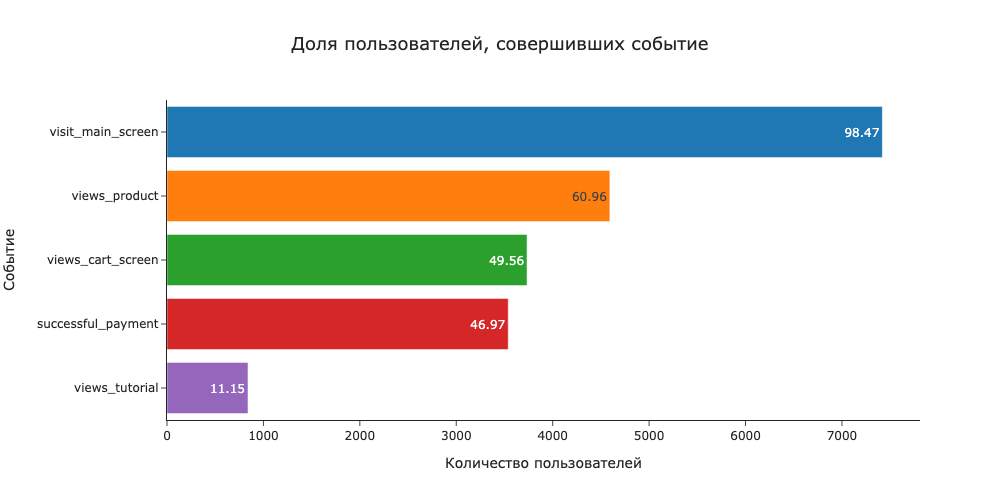

In [35]:
# построим график доли пользователей, совершивших событие
fig = px.bar(count_users_in_event,
             x='users_count', 
             y='event_type', 
             color='event_type', 
             text='share_all_users',
             template='simple_white', 
             title='Доля пользователей, совершивших событие')

fig.update_layout(xaxis_title='Количество пользователей', 
                  yaxis_title='Событие', 
                  autosize=False,
                  showlegend=False,
                  width=1000,
                  height=500, 
                  title={'font':dict(size=18), 'x':0.5})

fig.show("png")

**Вывод**

В процессе анализа выяснили:

 1. 7419 пользователей увидели главную страницу приложения - это 98.48% всех пользователей. Столь высокий процент может быть связан с тем, что большинство пользователей заходит непосредственно через приложение и автоматом видят главную страницу. Это первый шаг воронки событий.
 2. 4593 пользователя заходили на страницу товара - это 60.96% всех пользователей. На страницу товара пользователь может попасть и минуя главную страницу, перейдя по ссылке на товар из поисковика. Тем не менее 37.52% пользователей, просмотревших главную страницу, не переходят на страницу товара. А это может сигнализировать о том, что главная страница не "зацепила" потенциального покупателя. Необходимо обратить на это внимание. Этот шаг можно смело считать вторым этапом в воронке событий.
 3. 3734 пользователя заходили на страницу "Корзина" - это 49.56% всех пользователей. С одной стороны то, что пользователь перешел на страницу интересующего его товара и не дошел до корзины - вполне закономерно: посмотрел описание и передумал. А, с другой стороны, стоит обратить внимание на то, что 11.4% пользователей отваливаются на шаге просмотра страницы товара: достаточно ли удобное и полноценное описание товара, хорошо ли видна кнопка "Добавить в корзину". Но, если в приложении реализована возможность быстрой оплаты, то часть покупателей может сразу перескочить через этот шаг. Тем не менее этот шаг является третьим этапом в воронке событий.
 4. 3539 пользователя дошли до успешной оплаты - это 46.97% всех пользователей. Решение о покупке после добавления в корзину отклоняют только 2.59% пользователей. И это заключительный - четвертый этап воронки событий.
 5. 840 пользователей просмотрели страницу "Руководство пользователя" - это 11.15% всех пользователей. Данный шаг вообще никак не взаимосвязан и, соответственно, никак не влияет на какой-либо из предыдущих шагов. Поэтому данный шаг исключим из воронки событий.

**3. Построим воронку событий.**

Для этого приведем дынные таблицы count_users_in_event в соответствии с шагами воронки, определенными ранее.

In [36]:
count_users_in_event = count_users_in_event.loc[:, :'users_count']
count_users_in_event = count_users_in_event.loc[:3]
count_users_in_event

,event_type,users_count
0,visit_main_screen,7419
1,views_product,4593
2,views_cart_screen,3734
3,successful_payment,3539


In [37]:
# расчет конверсии в шаг
count_users_in_event['share_of_previous'] = (count_users_in_event['users_count'] / 
                                             count_users_in_event['users_count'].shift(periods=1) * 100).round(2)
# доля пользователей, успешно дошедших до оплаты с первого шага
count_users_in_event['share_of_initial'] = (count_users_in_event['users_count'] / 
                                          count_users_in_event['users_count'].loc[0] * 100).fillna(0).round(2)

In [38]:
count_users_in_event

,event_type,users_count,share_of_previous,share_of_initial
0,visit_main_screen,7419,NaN,100.00
1,views_product,4593,61.91,61.91
2,views_cart_screen,3734,81.30,50.33
3,successful_payment,3539,94.78,47.70


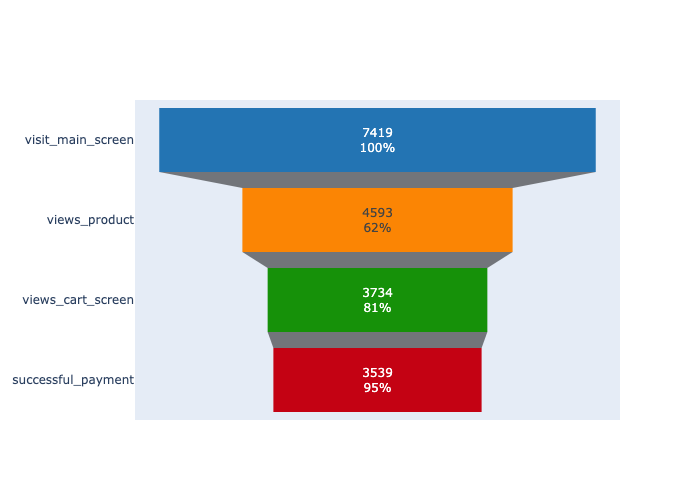

In [39]:
# построим воронку событий с долей пользователей, переходящих на следующий шаг - of previous
# и долей пользователей дошедших от первого до последнего шага - of initial

fig = (
    go.Figure(
        go.Funnel( 
            y=count_users_in_event['event_type'], 
            x=count_users_in_event['users_count'], 
            textposition = "inside", 
            textinfo = "value+percent previous", 
            marker = {"color": ["#2374b3", "#fb8504", "#169109", "#c40213"]}
        )
    )
)


fig.show("png")

**Вывод**

Воронка событий показала, что на этапе "Просмотра главной страницы" теряется больше всего пользователей - 38% не доходит до шага "Просмотр страницы товара". При этом, можно утверждать, что пользователь добавивший товар в корзину - в 95% случаев успешнно оплатит товара. От первого и до последнего шага доходит 47.7% пользователей.

Итого:
   1. шаг `visit_main_screen` совершили 7419 пользователей,
   2. шаг `views_product` совершили 4593 пользователей - это 61.9% к предыдущему и первоначальному шагу,
   3. шаг `views_cart_screen` совершили	3734 пользователей - это 81.3% к предыдущему и 50.3% к первоначальному шагу,
   4. шаг `successful_payment` совершили 3539 пользователей - это 94.8% к предыдущему и 47.7% к первоначальному шагу.

Посмотрим на воронку событий отдельно по каждой тестируемой группе. Возможно, они отражают туже динамику перехода между событиями общей воронки или, наборот, демонстрируют свой собственный путь.

In [40]:
# соберем данные о пользователях по каждой тестируемой группе
count_users_in_event_by_testgroup = (
    df
    .pivot_table(index='event_type',
                 columns='test_group',
                 values='device_id', 
                 aggfunc='nunique')
    .sort_values(by='A1', ascending=False)
    .reset_index()
)

# уберем шаг views_tutorial
count_users_in_event_by_testgroup = count_users_in_event_by_testgroup.loc[:3]
count_users_in_event_by_testgroup

test_group,event_type,A1,A2,B
0,visit_main_screen,2450,2476,2493
1,views_product,1542,1520,1531
2,views_cart_screen,1266,1238,1230
3,successful_payment,1200,1158,1181


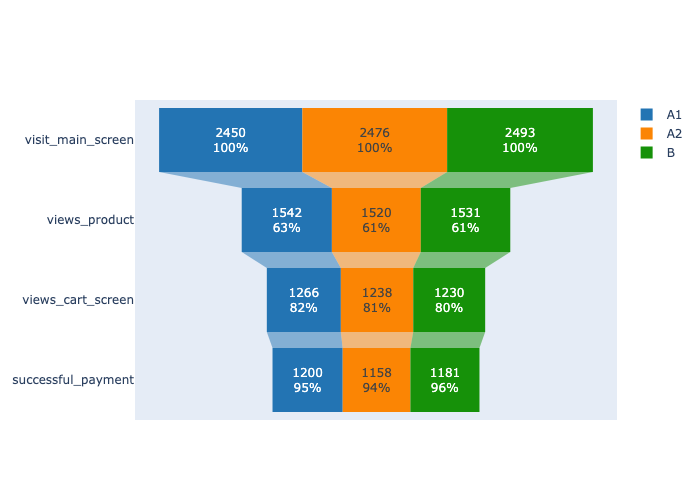

In [41]:
# построим составной график воронки событий по группам теста
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A1',
    y = count_users_in_event_by_testgroup['event_type'],
    x = count_users_in_event_by_testgroup['A1'],
    textinfo = "value+percent previous", 
    marker = {"color": "#2374b3"}))

fig.add_trace(go.Funnel(
    name = 'A2',
    orientation = "h",
    y = count_users_in_event_by_testgroup['event_type'],
    x = count_users_in_event_by_testgroup['A2'],
    textposition = "inside",
    textinfo = "value+percent previous", 
    marker = {"color": "#fb8504"}))

fig.add_trace(go.Funnel(
    name = 'B',
    orientation = "h",
    y = count_users_in_event_by_testgroup['event_type'],
    x = count_users_in_event_by_testgroup['B'],
    textposition = "inside",
    textinfo = "value+percent previous", 
    marker = {"color": "#169109"}))


fig.show("png")

**Вывод**

   Составная воронка событий по каждой тестируемой группе демонстрирует в общем-то такую же динамику переходы от шага к шагу с небольшим колебанием доли в пределах 1-1.5%, что и общая воронка событий. Тем самым подтверждается факт, что на этапе просмотра главной страницы теряется максимальная доля пользователей. <br> Возможно, причина кроется в первом зрительном эффекте, который главная страница производит на пользователя. Стоит обратить внимание дизайнеров и маркетологов и сделать главную страницу более привлекательной и "вкусной" для пользователей. Возможно пользователем не хватает "цепляющих" баннеров и акцентов на акционные товары. Нельзя исключать и вариант того, что на разных операционных системах устройств пользователей, интерфейс приложения отображается по-разному. Также не стоит исключать факт того, что в приложении может быть реализована система быстрой оплаты и с главной страницы можно купить тот или иной товар, минуя все последующие шаги. А может быть дело и в шрифте, который решили изменить дизайнеры. <br> Далее проверим, состоятельна ли их гипотеза?

## Анализ результатов эксперимента

На данном этапе сделаем следующее:

1. Определим сколько пользователей в каждой экспериментальной группе.
2. Проверим корректность всех механизмов и расчётов  в контрольных группах (А1 и А2) через проверку статистической разницы между выборками этих групп.
3. Выберем самое популярное событие.
4. Посчитаем число пользователей и долю, совершивших самое популярное событие в каждой из контрольных групп. Проверим статистически достоверно ли отличие между группами. 
5. Повторим пункт 4 для всех остальных событий. Проверим, можно ли утверждать, что разбиение на группы работает корректно?
6. Проведем аналогичные расчеты для экспериментальной группы (В). Сравним результаты экспериментальной группы с каждой из контрольных групп в отдельности по каждому событию. Также сравним результаты экспериментальной группы с результататми объединённой контрольной группой. 
7. Сделаем выводы из эксперимента.

Найдем общее количество пользователей в каждой тест-группе. И добавим строку с расчетом пользователей в объедененной контрольной группе:

In [42]:
total_count_users_by_testgroup = (
    df.groupby('test_group')['device_id'].nunique()
)

total_count_users_by_testgroup['A1+A2'] = total_count_users_by_testgroup['A1'] + total_count_users_by_testgroup['A2']
total_count_users_by_testgroup

test_group
A1       2484
A2       2513
B        2537
A1+A2    4997
Name: device_id, dtype: int64

Данные о пользователях по каждой тестируемой группе лежат в переменной `count_users_in_event_by_testgroup`. Добавим столбец с объединенной контрольной группой.

In [43]:
count_users_in_event_by_testgroup['A1+A2'] = (
    count_users_in_event_by_testgroup['A1'] + 
    count_users_in_event_by_testgroup['A2']
)
count_users_in_event_by_testgroup

test_group,event_type,A1,A2,B,A1+A2
0,visit_main_screen,2450,2476,2493,4926
1,views_product,1542,1520,1531,3062
2,views_cart_screen,1266,1238,1230,2504
3,successful_payment,1200,1158,1181,2358


Поскольку критериями успешного A/A-теста являются:

1. Количество пользователей в различных группах различается не более, чем на 1%;
2. Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно. 

Убедимся в том, что не было "подглядования" пользователей и каждая выборка состоит только из уникальных пользователей. А также проверим долю разницы количества пользователей в каждой выборках.

In [44]:
def check_groups(group_1, group_2):
    """
    функция находит массив пересекающихся значений и 
    подсчитывает долю разницы количества пользователей в двух группах
    """
    intersect_list = np.intersect1d((df[df['test_group'] == group_1]['device_id']), 
                                    (df[df['test_group'] == group_2]['device_id']))
    print('Количество пересекающихся пользователей в группах', group_1, 'и',  group_2, ':', intersect_list)
    print('Разница в количестве пользователей в группах', group_1, 'и',  group_2, ':',
          ('{:.1%}'.format(
              1 -
              df[df['test_group'] == group_1]['device_id']
              .nunique() / 
              df[df['test_group'] == group_2]['device_id']
              .nunique())
          ))

In [45]:
check_groups("A1", "A2")

Количество пересекающихся пользователей в группах A1 и A2 : []
Разница в количестве пользователей в группах A1 и A2 : 1.2%


Расчет показал, что пользователи в обеих контрольных группах уникальны, но есть небольшое превышение разницы в размерах выборок.
Проверим статистическую разницу доли пользователей, совершивших каждое из событий в двух группах.

**Сформулируем гипотезы:**

* Нулевая гипотеза: доли пользователей, совершивших событие в группах НЕ различаются.
* Альтернативная гипотеза: доли пользователей, совершивших событие в группах различаются.

In [46]:
def z_test(group1, group2, alpha):
    '''
    функция проверки гипотезы о равенстве долей пользователей, совершивших событие, в двух группах
    '''
    for i in count_users_in_event_by_testgroup.index:
        # пропорция успехов в группах
        p1 = count_users_in_event_by_testgroup[group1][i] / total_count_users_by_testgroup[group1]
        p2 = count_users_in_event_by_testgroup[group2][i] / total_count_users_by_testgroup[group2]
        # пропорция успехов в комбинированном датасете:
        p_combined = (
            (count_users_in_event_by_testgroup[group1][i] + 
             count_users_in_event_by_testgroup[group2][i]) / 
            (total_count_users_by_testgroup[group1] + 
             total_count_users_by_testgroup[group2])
        )
        # разница пропорций в группах
        difference = p1 - p2 
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = (difference / mth.sqrt(p_combined * 
                                         (1 - p_combined) * 
                                         (1 / total_count_users_by_testgroup[group1] + 
                                          1 / total_count_users_by_testgroup[group2])
                                        ))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        print('Для события', count_users_in_event_by_testgroup['event_type'][i], 'p-значение = ', p_value)
        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 
        print()

Для наглядности создадим функцию, строющую воронку событий для двух групп попарно:

In [47]:
def funnel_by_groups(group1, group2, color1, color2):
    '''
    функция строит воронку событий для каждой пары тест-групп
    '''
    fig = go.Figure()
    fig.add_trace(go.Funnel(name = group1,
                            y = count_users_in_event_by_testgroup['event_type'],
                            x = count_users_in_event_by_testgroup[group1],
                            textinfo = "value+percent previous", 
                            marker = {"color": color1}))
    fig.add_trace(go.Funnel(name = group2,
                            orientation = "h",
                            y = count_users_in_event_by_testgroup['event_type'],
                            x = count_users_in_event_by_testgroup[group2],
                            textposition = "inside",
                            textinfo = "value+percent previous", 
                            marker = {"color": color2}))
    
    fig.show("png")

**Посмотрим на график и статистическую разницу между группами `A1 и A2`:**

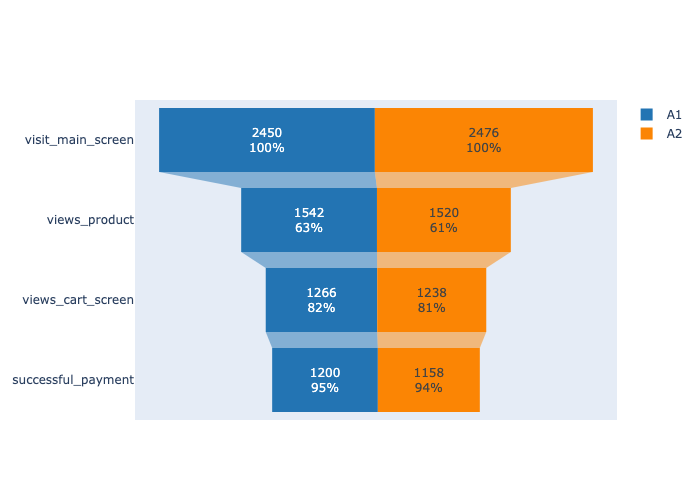

Для события visit_main_screen p-значение =  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события views_product p-значение =  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события views_cart_screen p-значение =  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события successful_payment p-значение =  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [48]:
funnel_by_groups('A1', 'A2', "#2374b3", "#fb8504")
z_test('A1', 'A2', 0.01)

**Вывод по группам A1 и А2**

Мы провели 4 проверки статестических гипотез по каждому событию в отдельности. <br> При уровне значимости alpha=0.01 статистически значимой разницы между контрольными группами не обнаружено, поэтому мы можем быть уверены в точности проведенного тестирования.

**Посмотрим на график и статистическую разницу между группами `A1 и B` и `A2 и B`:**

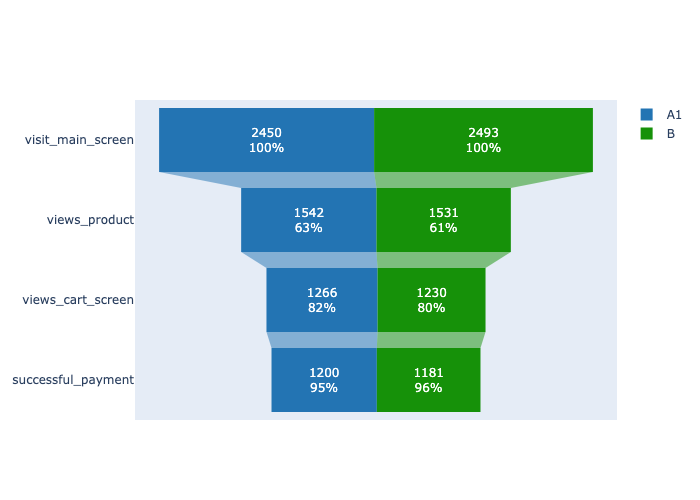

Для события visit_main_screen p-значение =  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события views_product p-значение =  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события views_cart_screen p-значение =  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события successful_payment p-значение =  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

______________________________________________________________________________________________________________ 



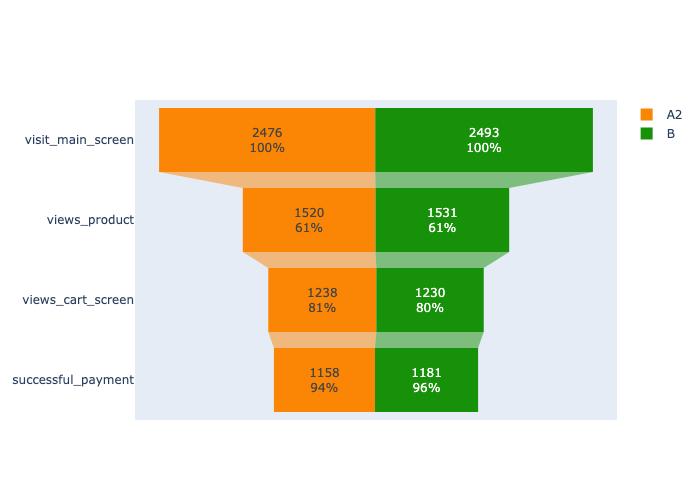

Для события visit_main_screen p-значение =  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события views_product p-значение =  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события views_cart_screen p-значение =  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события successful_payment p-значение =  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [49]:
funnel_by_groups('A1', 'B', "#2374b3", "#169109")
z_test('A1', 'B', 0.05)
print('_' * 110, '\n')
funnel_by_groups('A2', 'B', "#fb8504", "#169109")
z_test('A2', 'B', 0.05)

**Вывод по группам А1 и В, А2 и В**

Мы провели 8 проверок статестических гипотез по каждому событию в отдельности. <br> При уровене значимости alpha=0.1 в группах `А1 и В` в событии `views_cart_screen`  удалось отвергнуть нулевую гипотезу. Но, при таком уровне значимости каждый десятый раз можно получить ложный результат, поэтому возьмем уровень значимости alpha=0.05, хотя можно было бы и alpha=0.01 - в нашем случае результат останется тем же: статистически значимой разницы между всеми парами контрольных и экспериментальной группы не обнаружено.

**Посмотрим на график и статистическую разницу между группами `A1+А2 и B`:**

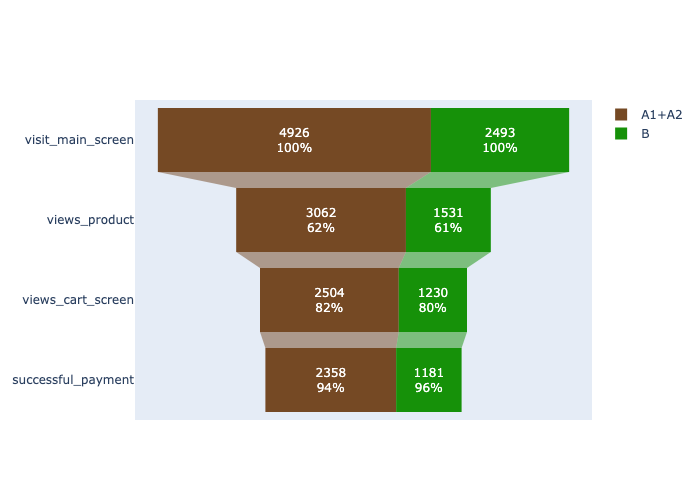

Для события visit_main_screen p-значение =  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события views_product p-значение =  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события views_cart_screen p-значение =  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Для события successful_payment p-значение =  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [50]:
funnel_by_groups('A1+A2', 'B', "#754924", "#169109")
z_test('A1+A2', 'B', 0.05)

**Вывод по группам А1+А2 и В**

Мы провели 4 проверки статестических гипотез по каждому событию в отдельности. <br> При уровне значимости 0.01 <= alpha <= 0.1 статистически значимой разницы между объединенной контрольной и экспериментальной группами не обнаружено.

## Общий вывод

В процесе анализа данных были проделаны следующие шаги:

**1. Проведен обзор и предобработка дынных к анализу:**
  - исходным обозначениям столбцов, событий и групп даны новые названия, наиболее точно отражающие сущность,
  - столбец с датой из unix time переведен к типу данных datetime,
  - удалены дубли.
  
 
**2. Изучены и проверены данные:**

Изначально в данных было:
   
   - Всего событий в логе: 243713 
   - Всего пользователей в логе: 7551 
   - Среднее количество событий на одного пользователя: 32 
   - Период данных: с 2019-07-25 по 2019-08-07 
   
В результате изучения и проверки логов был обнаружен период неполноценных данных с 25 июля по 1 августа. Данные представлены в полном объеме только за период с 1 по 8 августа. Поэтому дальнейший анализ будем проводить на этом срезе данных. Отбросив малоинформативные данные мы потеряли всего 1.17% событий и 0.23% пользователей. 

Итоги полноценных данных стало:

 * Всего событий в логе: 240887,
 * Всего пользователей в логе: 7534,
 * Среднее количество событий на одного пользователя: 31. 

**3. Изучили распределение событий в логах, построили воронку событий и выяснили:**

   1. первый шаг воронки событий - visit_main_screen -  совершили 7419 пользователей  - это 98.48% всех пользователей. Мы также выяснили, что на страницу товара пользователь может попасть и минуя главную страницу. Тем не менее 37.52% пользователей, просмотревших главную страницу, не переходят на страницу товара. А это может сигнализировать о том, что главная страница не "зацепила" потенциального покупателя.
   2. второй шаг воронки событий - views_product - совершили 4593 пользователя - это 60.96% всех пользователей. Выявлено, 11.4% пользователей отваливаются на шаге просмотра страницы товара, но, есть вероятность, что в приложении реализована возможность быстрой оплаты, поэтому часть покупателей может сразу перескочить через этот шаг к непосредственной оплате.
   3. третий шаг воронки событий - views_cart_screen - совершили 3734 пользователя - это 49.56% всех пользователей. 
   4. шаг четвертый воронки событий - successful_payment - совершили 3539 пользователя - это 46.97% всех пользователей. Решение о покупке после добавления в корзину отклоняют только 2.59% пользователей. 
   5. 840 пользователей просмотрели страницу "Руководство пользователя" - это 11.15% всех пользователей. Данный шаг вообще никак не взаимосвязан и, соответственно, никак не влияет на какой-либо из предыдущих шагов. Поэтому данный шаг был исключен из воронки событий.

Воронка событий показала, что на этапе "Просмотра главной страницы" теряется больше всего пользователей - 38% не доходит до шага "Просмотр страницы товара". При этом, можно утверждать, что пользователь добавивший товар в корзину - в 95% случаев успешнно оплатит товара. От первого и до последнего шага доходит 47.7% пользователей.

Итого:
  1. шаг `visit_main_screen` совершили 7419 пользователей,
  2. шаг `views_product` совершили 4593 пользователей - это 61.9% к предыдущему и первоначальному шагу,
  3. шаг `views_cart_screen` совершили	3734 пользователей - это 81.3% к предыдущему и 50.3% к первоначальному шагу,
  4. шаг `successful_payment` совершили 3539 пользователей - это 94.8% к предыдущему и 47.7% к первоначальному шагу.
    

**4. Анализ результатов эксперимента показал:**

В общей сложности мы провели 16 проверок статестических гипотез. И даже при уровне значимости  alpha=0.01 статистически значимой разницы попарно между контрольными, каждой контрольной и экспериментальной, а также объединенной контрольной и экспериментальной группами не обнаружено. На этом основании можно утвержать, что изменение шрифтов статистически значимо не повлияло на пользователей. И для менеджеров, и для дизайнеров эксперимент можно считать успешным, так как новые шрифты не отпугнули пользователей. Но стоит отметить, что и существенного притока пользователей, благодаря новым шрифтам тоже не произошло. 


**Рекомендации:**

Поскольку  на этапе просмотра главной страницы теряется максимальная доля пользователей, возможно, причина кроется в первом зрительном эффекте, который главная страница производит на пользователя. Стоит обратить внимание дизайнеров и маркетологов и сделать главную страницу более привлекательной и "вкусной" для пользователей. Возможно пользователем не хватает "цепляющих" баннеров и акцентов на акционные товары. Нельзя исключать и вариант того, что на разных операционных системах устройств пользователей, интерфейс приложения отображается по-разному. 